In [3]:
import pandas as pd

In [4]:
train_df=pd.read_csv('../Lection5/nlp_start/train.csv')
test_df=pd.read_csv('../Lection5/nlp_start/test.csv')

In [5]:
train_df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [6]:
train_df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
train_df.shape

(7613, 5)

In [8]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
train_shuffle=train_df.sample(frac=1,random_state=49) 
train_shuffle.head(20)

,id,keyword,location,text,target
74,107,accident,North Carolina,I-77 Mile Marker 31 South Mooresville Iredell...,1
5387,7687,panic,Toronto,tomorrow's going to be a year since I went to ...,1
4259,6051,heat%20wave,"Arnhem, the Netherlands",Arnhem Weather - &lt;p&gt;An unrelenting and d...,1
2119,3045,death,Home of the Takers.,Y'all PUSSSSSSSSSY AND SHOOOK TO DEATH OF ME,0
6078,8684,sinkhole,"Haddonfield, NJ",Georgia sinkhole closes road swallows whole po...,1
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1
2118,3044,death,Carry On Jutta!!!,Afghan peace talks in doubt after Mullah Omar'...,0
3931,5589,flood,NaN,Internet basics: the flood defective intertiss...,1
530,770,avalanche,South Central Wales,I saw two great punk bands making original mus...,0
4186,5947,hazard,a van down by the river,@phiddleface NOT IF THERES A CHOKING HAZARD!!!...,0


In [10]:
print(f"Total train samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total  samples: {len(train_df)+len(test_df)}")

Total train samples: 7613
Total test samples: 3263
Total  samples: 10876


In [11]:
import random

random_index=random.randint(0, len(train_df)-4)

for row in train_shuffle[['text','target']][random_index:random_index+4].itertuples():
    print(row)


Pandas(Index=420, text='Bloor/Ossington arsonist also burned a mattress on Northumberland St #cbcto http://t.co/wpDvT31sne', target=0)
Pandas(Index=2620, text='@LT3dave so many specs so much fan service so much lore destruction', target=0)
Pandas(Index=4872, text='Not only are you a mass murderer but at a movie theatre where niggas dropped bread to see a movie? Cmon man.', target=0)
Pandas(Index=2390, text='Dozens dead as two trains derail over river in India http://t.co/zkKn6mSE1n http://t.co/FzHJF8BXlD', target=1)


In [12]:
from sklearn.model_selection import train_test_split

train_sentences, test_sentences, train_labels,test_labels = train_test_split(
    train_shuffle['text'].to_numpy(),
    train_shuffle['target'].to_numpy(),
    test_size=0.1, 
    random_state=49
)

In [13]:
train_sentences.dtype, train_labels.dtype

(dtype('O'), dtype('int64'))

In [14]:
len(train_sentences), len(test_sentences)

(6851, 762)

In [15]:
import tensorflow as tf 
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [16]:
text_vectorizer = TextVectorization(max_tokens=10000, 
                                    standardize="lower_and_strip_punctuation", 
                                    output_sequence_length=15)

In [17]:
text_vectorizer.adapt(train_sentences)

In [18]:
sample_sentense="I Love Tensorflow"

text_vectorizer([sample_sentense])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  8, 107,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=int64)>

In [19]:
words = text_vectorizer.get_vocabulary()



In [20]:
from tensorflow.keras.layers import Embedding

In [21]:
embedding = Embedding(
                        input_dim=10000, 
                        output_dim=128, 
                        input_length=15, 
                        name = 'embeding_1'
)

In [22]:
embedding

In [23]:
sample_embed = embedding(text_vectorizer("I Love Tensorflow"))
sample_embed

<tf.Tensor: shape=(15, 128), dtype=float32, numpy=
array([[-0.00399926,  0.0213283 ,  0.04242614, ...,  0.02847807,
        -0.02096679,  0.00185518],
       [ 0.02454695,  0.03934847, -0.00569483, ...,  0.02452961,
         0.04083823, -0.00445603],
       [-0.0222628 ,  0.00700254,  0.01960233, ..., -0.04525923,
         0.00744903, -0.04620118],
       ...,
       [-0.04483178, -0.00381769,  0.01230688, ..., -0.0416295 ,
         0.0351048 , -0.04566411],
       [-0.04483178, -0.00381769,  0.01230688, ..., -0.0416295 ,
         0.0351048 , -0.04566411],
       [-0.04483178, -0.00381769,  0.01230688, ..., -0.0416295 ,
         0.0351048 , -0.04566411]], dtype=float32)>

#### finish previous lection

------------------------------------------------------------------------------------------------


## Lection 3 start

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

C:\Users\38068\.conda\envs\tutorialspoint\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [26]:
model_0= Pipeline([ 
    ("tfidf",TfidfVectorizer()), 
    ("clf", MultinomialNB())
])

In [27]:
model_0.fit(train_sentences,train_labels)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [28]:
baseline_score= model_0.score(test_sentences,test_labels)

baseline_score

0.8097112860892388

In [29]:
y_hat0=model_0.predict(test_sentences)

In [30]:
test_labels[:10], y_hat0[:10]

(array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64))

In [31]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [32]:
calculate_results(test_labels,y_hat0)

{'accuracy': 80.97112860892388,
 'precision': 0.8184785838596061,
 'recall': 0.8097112860892388,
 'f1': 0.8032877870568117}

In [33]:
test_sentences.dtype

dtype('O')

In [34]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_1 = tf.keras.Model(inputs,outputs,name="model_1_dense")


In [35]:
model_1.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

In [36]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embeding_1 (Embedding)       (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [37]:
model_1_history = model_1.fit(train_sentences, train_labels, 
                                epochs=5, 
                                validation_data=(test_sentences,test_labels))

Epoch 1/5
215/215 [==============================] - 6s 24ms/step - loss: 0.6115 - accuracy: 0.6897 - val_loss: 0.5208 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 4s 16ms/step - loss: 0.4435 - accuracy: 0.8170 - val_loss: 0.4421 - val_accuracy: 0.8071
Epoch 3/5
215/215 [==============================] - 4s 16ms/step - loss: 0.3495 - accuracy: 0.8618 - val_loss: 0.4263 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 4s 20ms/step - loss: 0.2862 - accuracy: 0.8905 - val_loss: 0.4317 - val_accuracy: 0.8084
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.2387 - accuracy: 0.9117 - val_loss: 0.4436 - val_accuracy: 0.8005


In [38]:
model_1.evaluate(test_sentences,test_labels)

24/24 [==============================] - 0s 1ms/step - loss: 0.4436 - accuracy: 0.8005


[0.44356831908226013, 0.8005249500274658]

In [39]:
res_model_1=pd.DataFrame(model_1_history.history)

<AxesSubplot:>

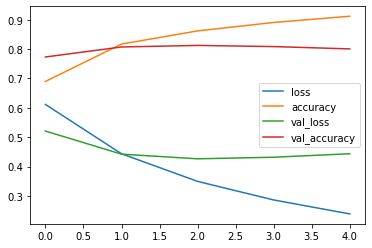

In [40]:
res_model_1.plot()

In [41]:
test_labels.shape

(762,)

In [42]:
y_hat1=model_1.predict(test_sentences)

In [43]:
y_hat1=tf.squeeze(tf.round(y_hat1))

In [44]:
test_labels

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [45]:
calculate_results(test_labels,y_hat1)

{'accuracy': 80.0524934383202,
 'precision': 0.7995638255896308,
 'recall': 0.800524934383202,
 'f1': 0.7987526167895771}

In [46]:
calculate_results(test_labels,y_hat0)

{'accuracy': 80.97112860892388,
 'precision': 0.8184785838596061,
 'recall': 0.8097112860892388,
 'f1': 0.8032877870568117}

#### finish previous lection

------------------------------------------------------------------------------------------------


## Lection 4 start

In [47]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_2 = tf.keras.Model(inputs,outputs,name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [48]:
model_2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

In [49]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embeding_1 (Embedding)       (None, 15, 128)           1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [50]:
model_2_history = model_2.fit(
                                train_sentences,train_labels, 
                                epochs=5, 
                                validation_data=(test_sentences,test_labels)
)

Epoch 1/5
215/215 [==============================] - 8s 24ms/step - loss: 0.2277 - accuracy: 0.9165 - val_loss: 0.5040 - val_accuracy: 0.8045
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.1529 - accuracy: 0.9451 - val_loss: 0.6752 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 6s 27ms/step - loss: 0.1297 - accuracy: 0.9548 - val_loss: 0.5699 - val_accuracy: 0.7861
Epoch 4/5
215/215 [==============================] - 5s 21ms/step - loss: 0.1070 - accuracy: 0.9610 - val_loss: 0.7227 - val_accuracy: 0.7848
Epoch 5/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0858 - accuracy: 0.9663 - val_loss: 0.7746 - val_accuracy: 0.7743


In [51]:
model_2.evaluate(test_sentences,test_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.7746 - accuracy: 0.7743


[0.774585485458374, 0.7742782235145569]

In [52]:
y_hat2=model_2.predict(test_sentences)

y_hat2[:10]

array([[9.9854833e-01],
       [8.3367795e-01],
       [8.6164474e-04],
       [4.0258467e-01],
       [5.2180851e-01],
       [3.7958914e-01],
       [1.9576666e-01],
       [5.9322566e-02],
       [8.1126899e-02],
       [9.9983454e-01]], dtype=float32)

In [53]:
y_hat2=tf.squeeze(tf.round(y_hat2))

y_hat2

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0

In [54]:
calculate_results(test_labels,y_hat2),calculate_results(test_labels,y_hat1),calculate_results(test_labels,y_hat0)

({'accuracy': 77.42782152230971,
  'precision': 0.7727560393294721,
  'recall': 0.7742782152230971,
  'f1': 0.7725864527237782},
 {'accuracy': 80.0524934383202,
  'precision': 0.7995638255896308,
  'recall': 0.800524934383202,
  'f1': 0.7987526167895771},
 {'accuracy': 80.97112860892388,
  'precision': 0.8184785838596061,
  'recall': 0.8097112860892388,
  'f1': 0.8032877870568117})

In [55]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.GRU(64)(x)
print(x.shape)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_3 = tf.keras.Model(inputs,outputs,name="model_3_GRU")

(None, 15, 128)
(None, 64)


In [56]:
model_3.compile(loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

In [57]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embeding_1 (Embedding)       (None, 15, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 64)                37248     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_________________________________________________________________


In [58]:
model_3.fit(train_sentences,train_labels, 
            epochs=5, 
            validation_data=(test_sentences,test_labels)           

)

Epoch 1/5
215/215 [==============================] - 8s 26ms/step - loss: 0.1628 - accuracy: 0.9384 - val_loss: 0.7381 - val_accuracy: 0.7585
Epoch 2/5
215/215 [==============================] - 6s 26ms/step - loss: 0.0834 - accuracy: 0.9710 - val_loss: 0.8136 - val_accuracy: 0.7598
Epoch 3/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0741 - accuracy: 0.9729 - val_loss: 0.8077 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0627 - accuracy: 0.9747 - val_loss: 0.8547 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0589 - accuracy: 0.9762 - val_loss: 1.0180 - val_accuracy: 0.7507


In [59]:
model_3.evaluate(test_sentences,test_labels)

24/24 [==============================] - 0s 2ms/step - loss: 1.0180 - accuracy: 0.7507


[1.0179933309555054, 0.7506561875343323]

In [60]:
y_hat3 = model_3.predict(test_sentences)

y_hat3[:10]

array([[9.9979544e-01],
       [9.9464631e-01],
       [2.0626187e-04],
       [4.2023152e-02],
       [9.7491050e-01],
       [9.7601277e-01],
       [1.9881132e-01],
       [2.6859438e-01],
       [9.0889609e-01],
       [9.9989808e-01]], dtype=float32)

In [61]:
y_hat3=tf.squeeze(tf.round(y_hat3))

y_hat3

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0

In [62]:
calculate_results(test_labels,y_hat3)

{'accuracy': 75.06561679790026,
 'precision': 0.7514286498972695,
 'recall': 0.7506561679790026,
 'f1': 0.7509955435558505}

In [63]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.Bidirectional(layers.LSTM(16))(x)
print(x.shape)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_4 = tf.keras.Model(inputs,outputs,name="model_4_Bidirectional_LSTM")

(None, 15, 128)
(None, 32)


In [64]:
model_4.compile(loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

In [65]:
model_4.summary()

Model: "model_4_Bidirectional_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embeding_1 (Embedding)       (None, 15, 128)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                18560     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,298,593
Trainable params: 1,298,593
Non-trainable params: 0
_________________________________________________________________


In [66]:
model_4.fit(train_sentences,train_labels,epochs=5, 
validation_data=(test_sentences,test_labels))

Epoch 1/5
215/215 [==============================] - 8s 22ms/step - loss: 0.1670 - accuracy: 0.9613 - val_loss: 0.7397 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0671 - accuracy: 0.9762 - val_loss: 0.8940 - val_accuracy: 0.7441
Epoch 3/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0544 - accuracy: 0.9762 - val_loss: 0.9846 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0460 - accuracy: 0.9807 - val_loss: 1.0298 - val_accuracy: 0.7520
Epoch 5/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0417 - accuracy: 0.9791 - val_loss: 1.2122 - val_accuracy: 0.7454


In [67]:
model_4.evaluate(test_sentences,test_labels)

24/24 [==============================] - 0s 3ms/step - loss: 1.2122 - accuracy: 0.7454


[1.2122479677200317, 0.7454068064689636]

In [68]:
y_hat4 = model_4.predict(test_sentences)

In [69]:
y_hat4=tf.squeeze(tf.round(y_hat4))

y_hat4[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 1., 1., 0., 1., 1., 1.], dtype=float32)>

In [70]:
calculate_results(test_labels,y_hat4)

{'accuracy': 74.54068241469817,
 'precision': 0.7436407903224552,
 'recall': 0.7454068241469817,
 'f1': 0.7439988378693527}

#### finish previous lection

------------------------------------------------------------------------------------------------


## Lection 5 start

In [71]:
tf.random.set_seed(49)

from tensorflow.keras import layers

In [72]:
model_5embedding = layers.Embedding(input_dim=10000, 
                                    output_dim=128, 
                                    embeddings_initializer="uniform", 
                                    input_length=15, 
                                    name="embedding_5")

In [73]:
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x= model_5embedding(x)
x= layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x= layers.GlobalMaxPool1D()(x)

outputs=layers.Dense(1,activation="sigmoid")(x)

model_5 = tf.keras.Model(inputs,outputs, name="model_5_Conv1D")


In [74]:
model_5.compile(
            loss="binary_crossentropy", 
            optimizer=tf.keras.optimizers.Adam(), 
            metrics=["accuracy"]
)

In [75]:
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 15, 128)           1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 11, 32)            20512     
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,300,545
Trainable params: 1,300,545
Non-trainable params: 0
__________________________________________

In [76]:
model_5_history= model_5.fit(
    train_sentences,train_labels, epochs=5, validation_data=(test_sentences, test_labels)
)

Epoch 1/5
215/215 [==============================] - 6s 25ms/step - loss: 0.5629 - accuracy: 0.7190 - val_loss: 0.4354 - val_accuracy: 0.8058
Epoch 2/5
215/215 [==============================] - 6s 26ms/step - loss: 0.3407 - accuracy: 0.8578 - val_loss: 0.4342 - val_accuracy: 0.8058
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.2103 - accuracy: 0.9223 - val_loss: 0.4987 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.1339 - accuracy: 0.9581 - val_loss: 0.5580 - val_accuracy: 0.7927
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0941 - accuracy: 0.9701 - val_loss: 0.5974 - val_accuracy: 0.7887


In [77]:
y_hat5=model_5.predict(test_sentences)

y_hat5[:10]

array([[0.9873441 ],
       [0.30326307],
       [0.29388368],
       [0.82518697],
       [0.81672925],
       [0.01382145],
       [0.05414483],
       [0.10373542],
       [0.7643857 ],
       [0.99999744]], dtype=float32)

In [78]:
y_hat5=tf.squeeze(tf.round(y_hat5))

y_hat5[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 1., 1.], dtype=float32)>

In [79]:
calculate_results(y_true=test_labels, y_pred=y_hat5)

{'accuracy': 78.87139107611549,
 'precision': 0.7874771155108337,
 'recall': 0.7887139107611548,
 'f1': 0.7874783506734244}

In [80]:
import tensorflow_hub as hub
url="https://tfhub.dev/google/universal-sentence-encoder/4"

sentence_encoder_layer = hub.KerasLayer(url,input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [81]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_5 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [82]:
model_6.compile(
    loss="binary_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)


In [83]:
model_6_history=model_6.fit(train_sentences,train_labels,epochs=5,
                        validation_data=(test_sentences,test_labels))

Epoch 1/5
215/215 [==============================] - 4s 10ms/step - loss: 0.5096 - accuracy: 0.7822 - val_loss: 0.4186 - val_accuracy: 0.8084
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4191 - accuracy: 0.8145 - val_loss: 0.4022 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4045 - accuracy: 0.8234 - val_loss: 0.3972 - val_accuracy: 0.8189
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3959 - accuracy: 0.8243 - val_loss: 0.3987 - val_accuracy: 0.8202
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3874 - accuracy: 0.8313 - val_loss: 0.3972 - val_accuracy: 0.8150


In [84]:
y_hat6=model_6.predict(test_sentences)

y_hat6[:10]

array([[0.8960887 ],
       [0.15786627],
       [0.10572582],
       [0.37096328],
       [0.07094651],
       [0.10888442],
       [0.31734583],
       [0.10547283],
       [0.52195483],
       [0.97183394]], dtype=float32)

In [85]:
y_hat6=tf.squeeze(tf.round(y_hat6))

y_hat6[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 0., 0.], dtype=float32)>

In [86]:
calculate_results(test_labels,y_hat6)

{'accuracy': 81.49606299212599,
 'precision': 0.8140768036413563,
 'recall': 0.8149606299212598,
 'f1': 0.8138785555587134}

#### finish previous lection

------------------------------------------------------------------------------------------------


## Lection 6 start

In [99]:
tf_hub_embedding_layer = hub.KerasLayer(url,input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=True, 
                                        name="USE-FT")

In [100]:
model_7 = tf.keras.Sequential([
  tf_hub_embedding_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_7_USE_fine_tuning")

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


model_7.summary()

Model: "model_7_USE_fine_tuning"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE-FT (KerasLayer)          (None, 512)               256797824 
_________________________________________________________________
dense_11 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 256,830,721
Trainable params: 256,830,721
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_7_history=model_7.fit(train_sentences,train_labels,epochs=2,
                        validation_data=(test_sentences,test_labels))

In [102]:
y_hat7=model_7.predict(test_sentences)
y_hat7=tf.squeeze(tf.round(y_hat7))
calculate_results(test_labels,y_hat7)

{'accuracy': 82.1522309711286,
 'precision': 0.8297666330569283,
 'recall': 0.821522309711286,
 'f1': 0.8160130562361804}